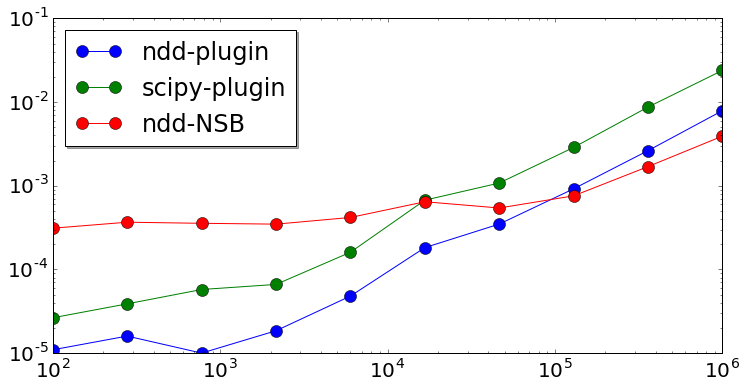

In [7]:
import ndd
import numpy as np
import scipy.stats
from matplotlib import pylab

#tell matplotlib to plot inline
%matplotlib inline

#increase the font size and markers size
from matplotlib import rc
rc('font', size=20)
rc('lines', markersize=12)

def dice_rolls(k,n):
    import numpy as np
    p = np.full(k,1.0/k)                # the probability of each face is 1/k
    counts = np.random.multinomial(n,p) # generate random counts according to p
    return counts

def timer(func,data): 
    import time
    t0 = time.time()
    s = func(data)
    return (time.time() - t0)
def ndd_plugin(data):
    return ndd.entropy(data,algorithm='plugin')

nrep = 10
names = ['ndd-plugin','scipy-plugin','ndd-NSB']
algorithms = [ndd_plugin,scipy.stats.entropy,ndd.entropy]
#names = ['ndd-NSB','ndd-plugin']
#algorithms = [ndd.entropy,ndd_plugin]
nalg = len(algorithms)

norder = 6
npoints = (norder-1)*2
X = [int(x) for x in np.logspace(2,norder,npoints)]
Y = np.zeros((npoints,nalg))
for j,t in enumerate(X):
    k = t; n = t # we will use n = k
    counts = dice_rolls(k,n)
    for rep in range(nrep):
        for i,alg in enumerate(algorithms):
            Y[j,i] += timer(alg,counts)
Y /= float(nrep)
pylab.figure(figsize=(12,6))
for i,alg in enumerate(algorithms):
    pylab.loglog(X,Y[:,i],'-o',label=names[i])    
pylab.legend(loc='upper left', shadow=True)

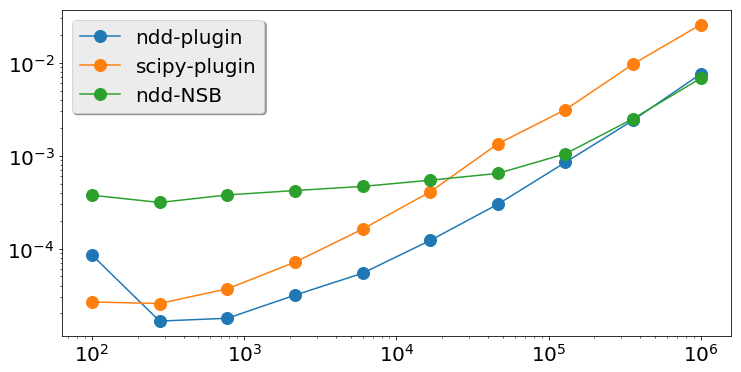

In [1]:
import ndd
import numpy as np
import scipy.stats
from matplotlib import pylab

#tell matplotlib to plot inline
%matplotlib inline

#increase the font size and markers size
from matplotlib import rc
rc('font', size=20)
rc('lines', markersize=12)

def dice_rolls(k,n):
    import numpy as np
    p = np.full(k,1.0/k)                # the probability of each face is 1/k
    counts = np.random.multinomial(n,p) # generate random counts according to p
    return counts

def timer(func,data): 
    import time
    t0 = time.time()
    s = func(data)
    return (time.time() - t0)
def ndd_plugin(data):
    return ndd.entropy(data,dist=True)

nrep = 10
names = ['ndd-plugin','scipy-plugin','ndd-NSB']
algorithms = [ndd_plugin,scipy.stats.entropy,ndd.entropy]
#names = ['ndd-NSB','ndd-plugin']
#algorithms = [ndd.entropy,ndd_plugin]
nalg = len(algorithms)

norder = 6
npoints = (norder-1)*2
X = [int(x) for x in np.logspace(2,norder,npoints)]
Y = np.zeros((npoints,nalg))
for j,t in enumerate(X):
    k = t; n = t # we will use n = k
    counts = dice_rolls(k,n)
    for rep in range(nrep):
        for i,alg in enumerate(algorithms):
            Y[j,i] += timer(alg,counts)
Y /= float(nrep)
pylab.figure(figsize=(12,6))
for i,alg in enumerate(algorithms):
    pylab.loglog(X,Y[:,i],'-o',label=names[i])    
pylab.legend(loc='upper left', shadow=True)

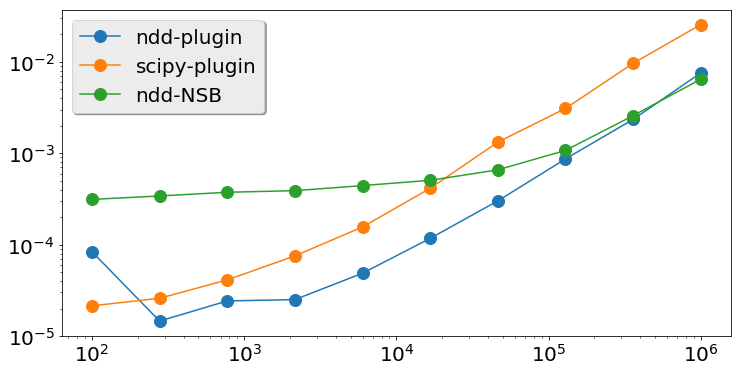

In [1]:
import ndd
import numpy as np
import scipy.stats
from matplotlib import pylab

#tell matplotlib to plot inline
%matplotlib inline

#increase the font size and markers size
from matplotlib import rc
rc('font', size=20)
rc('lines', markersize=12)

def dice_rolls(k,n):
    import numpy as np
    p = np.full(k,1.0/k)                # the probability of each face is 1/k
    counts = np.random.multinomial(n,p) # generate random counts according to p
    return counts

def timer(func,data): 
    import time
    t0 = time.time()
    s = func(data)
    return (time.time() - t0)
def ndd_plugin(data):
    return ndd.entropy(data,dist=True)

nrep = 10
names = ['ndd-plugin','scipy-plugin','ndd-NSB']
algorithms = [ndd_plugin,scipy.stats.entropy,ndd.entropy]
#names = ['ndd-NSB','ndd-plugin']
#algorithms = [ndd.entropy,ndd_plugin]
nalg = len(algorithms)

norder = 6
npoints = (norder-1)*2
X = [int(x) for x in np.logspace(2,norder,npoints)]
Y = np.zeros((npoints,nalg))
for j,t in enumerate(X):
    k = t; n = t # we will use n = k
    counts = dice_rolls(k,n)
    for rep in range(nrep):
        for i,alg in enumerate(algorithms):
            Y[j,i] += timer(alg,counts)
Y /= float(nrep)
pylab.figure(figsize=(12,6))
for i,alg in enumerate(algorithms):
    pylab.loglog(X,Y[:,i],'-o',label=names[i])    
pylab.legend(loc='upper left', shadow=True)

In [1]:
import numpy
from numpy import random
from scipy.stats import entropy
import numpy.random

def dice_rolls(k,n):
    import numpy as np
    p = np.full(k,1.0/k)                # the probability of each face is 1/k
    counts = np.random.multinomial(n,p) # generate random counts according to p
    return counts

def random_counts(n=None, k=None, a=None):
    pp = random.dirichlet([a]*k)
    pp /= numpy.sum(pp)
    return (pp, random.multinomial(n, pp))

t_nsb = []
t_ml = []
t_scipy = []
a = 1.0
ns = [100000,1000000]
for n in ns:
    k = 1000000000
    #pp, counts = random_counts(n=n, k=k, a=a)
    pp = [0.1, 0.1]
    counts = numpy.random.random_integers(0,2,size=1000000000)
    result = %timeit -o entropy(counts)
    t_scipy.append(result.average)
    result = %timeit -o ndd.entropy(counts)
    t_nsb.append(result.average)
    result = %timeit -o ndd.entropy(counts, dist=True)
    t_ml.append(result.average)

/home/simo/.local/lib/python3.5/site-packages/ipykernel/__main__.py:26: DeprecationWarning: This function is deprecated. Please call randint(0, 2 + 1) instead


MemoryError: 

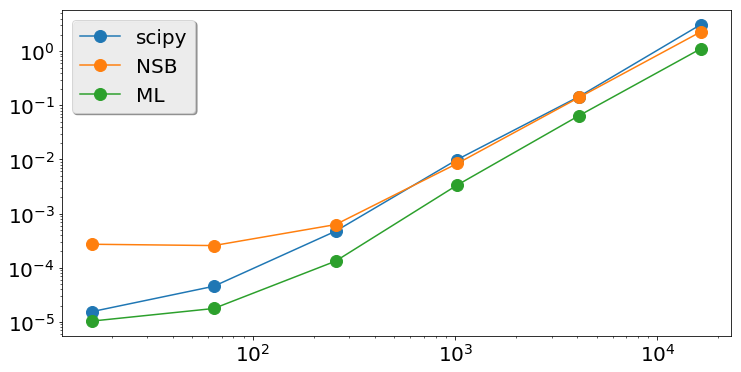

In [52]:
from matplotlib import pyplot as plt
#increase the font size and markers size

from matplotlib import rc
rc('font', size=20)
rc('lines', markersize=12)

fig, axs = plt.subplots(1,1,figsize=(12,6))
axs.semilogx()
axs.semilogy()
axs.plot(ns, t_scipy, '-o', label='scipy')
axs.plot(ns, t_nsb, '-o', label='NSB')
axs.plot(ns, t_ml, '-o', label='ML')
plt.legend(loc='upper left', shadow=True)



In [30]:
x = 1.0
result = %timeit -o x**2

68.1 ns ± 0.694 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [32]:
type(result.average)

float